In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv('infy.csv')
text=pd.read_csv('india-news-headlines.csv')
text.tail(3)

,publish_date,headline_category,headline_text
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [4]:
print(df.shape)
print(df.info())
df.head(2)

(6395, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6395 entries, 0 to 6394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6395 non-null   object 
 1   Open       6381 non-null   float64
 2   High       6381 non-null   float64
 3   Low        6381 non-null   float64
 4   Close      6381 non-null   float64
 5   Adj Close  6381 non-null   float64
 6   Volume     6381 non-null   float64
dtypes: float64(6), object(1)
memory usage: 349.9+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.555412,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.553166,204800.0


In [5]:
df.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
6393,2021-05-17,1320.300049,1334.949951,1320.300049,1329.400024,1329.400024,5017129.0
6394,2021-05-18,1338.000000,1344.599976,1329.500000,1340.000000,1340.000000,5620150.0


In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.dropna(inplace=True)
print(df.shape)

(6381, 7)


In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:xlabel='Date'>

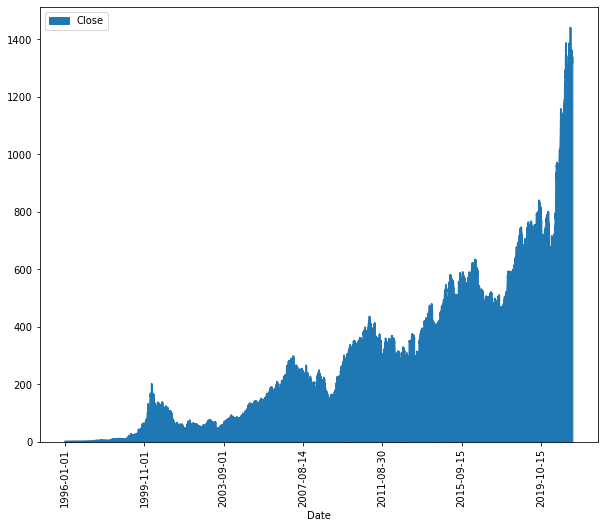

In [55]:
df.plot.area(x='Date',y='Close',rot=90,figsize=(10,8))

In [9]:
df['price']=df['Close']-df['Open']

<AxesSubplot:xlabel='Date', ylabel='price'>

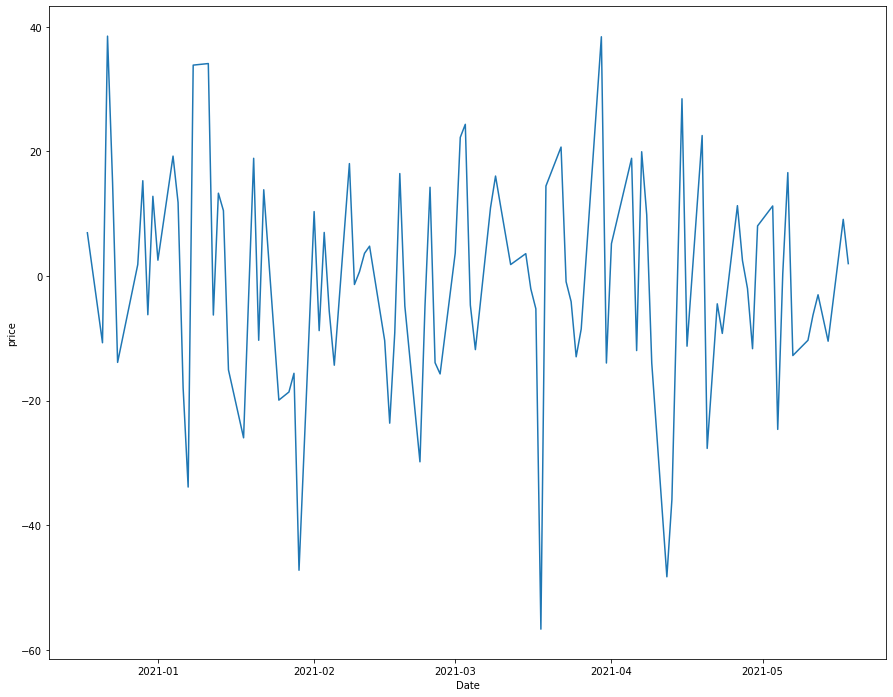

In [12]:
plt.figure(figsize=(15,12))
sns.lineplot(x=df['Date'].tail(100),y=df['price'].tail(100))

<AxesSubplot:ylabel='Density'>

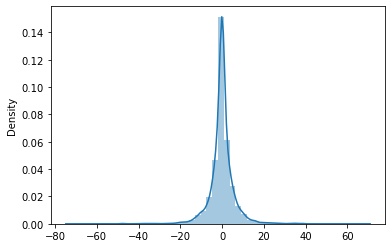

In [60]:
sns.distplot(df['Close']-df['Open'])

<AxesSubplot:xlabel='Close', ylabel='Count'>

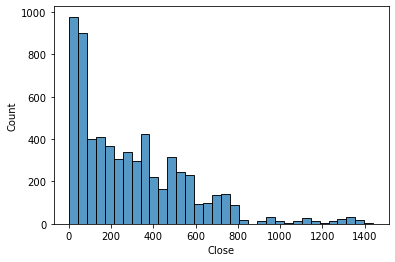

In [88]:
sns.histplot(df['Close'])

In [86]:
train,test=train_test_split(df,test_size=0.4)

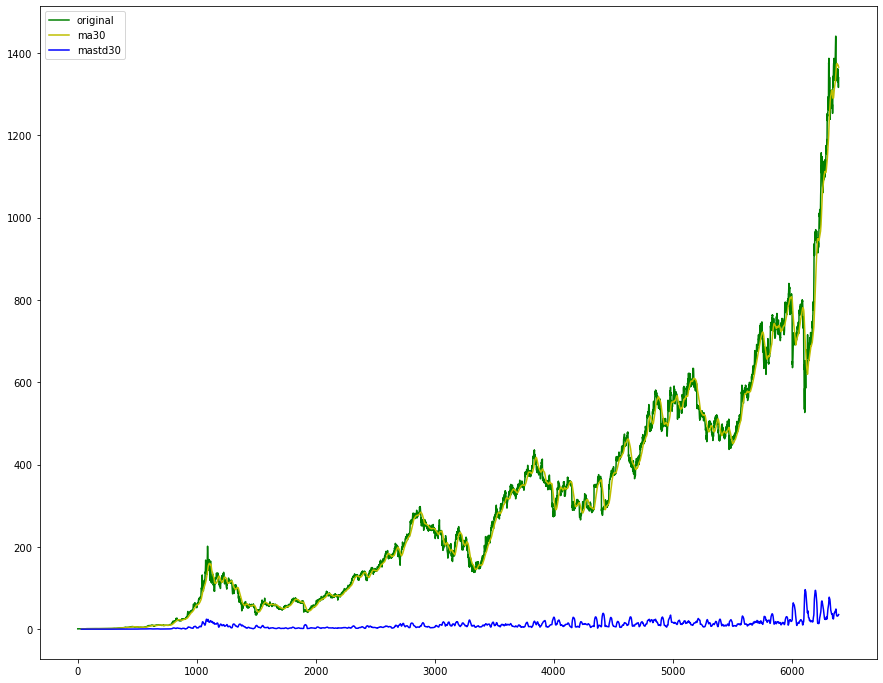

In [18]:
def testseries(timeseries,n):
    mean=timeseries.rolling(n).mean().shift()
    std=timeseries.rolling(n).std().shift()
    plt.figure(figsize=(15,12))
    plt.plot(timeseries,color='g',label='original')
    plt.plot(mean,color='y',label='ma'+str(n))
    plt.plot(std,color='b',label='mastd'+str(n))
    plt.legend()
    plt.show(block=False)
testseries(df['Close'],30)

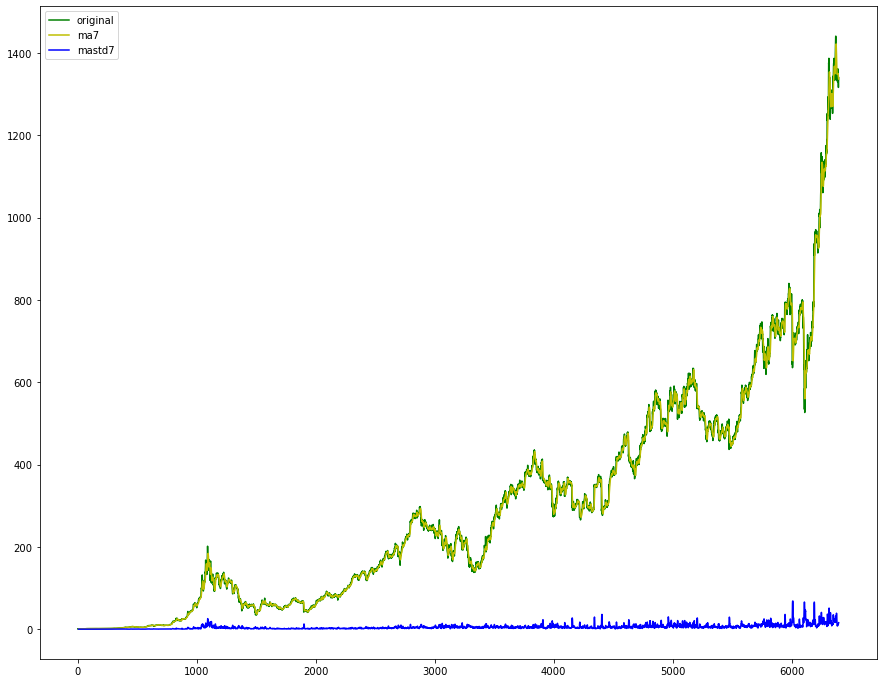

In [19]:
testseries(df['Close'],7)

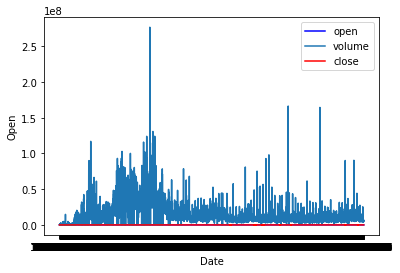

In [121]:

sns.lineplot(df['Date'],df['Open'],color='b',label='open')
plt.plot(df['Volume'],label='volume')
sns.lineplot(df['Date'],df['Close'],color='r',label='close')
plt.legend()
plt.show(block=False)

In [32]:
area=px.area(df,x='Date',y='Close',title='infy share price')
area.update_xaxes(title_text = 'date')
area.update_yaxes(title_text = 'infy close price', tickprefix = 'inr')
area.update_layout(showlegend = False)